In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path

import pandas as pd
import plotly.express as px

import plotly.io as pio

pio.renderers.default = "png"

<IPython.core.display.Javascript object>

In [3]:
all_incidents = pd.read_feather(
    Path("../data/processed/all_incidents.feather")
).sort_values("current_as_of")
all_incidents.head(5)

,incident_name,current_as_of,incident_type,date_of_origin,incident_commander,percent_of_perimeter_contained,size_acres,lat,lon,cause,total_personnel,fuels_involved,planned_actions,weather_concerns,location,estimated_containment_date,significant_events,projected_incident_activity,incident_description,remarks
418,East Desert Fire,2020-05-25 14:11:59-05:00,Wildfire,2020-05-17 13:00:00,"Jeff Gallivan, DFFM & Joe Roznovak, DFFM IC Tr...",1.00,1492.0,33.839,-112.023,"Human, Under Investigation",5,"Grass, Brush, Desert Veg",Monitor for hotspots & mop up,Wind gusts over next few days,"24th St. & Desert Hills, Cave Creek. 4 miles N...",2020-05-22 16:00:00,None,None,Wildfire,None
622,SHF Lightning Fires 2020,2020-06-05 09:55:47-05:00,Wildfire,NaT,Bell,NaN,15.0,40.823,-122.103,Lightning,None,Timber,None,None,None,NaT,None,None,None,None
229,June Lightning 2020,2020-06-12 20:37:48-05:00,Wildfire,2020-06-04 11:45:00,KRRD Fire Mgmt.,NaN,6.0,35.956,-118.236,Lightning,None,"Grass, brush, and standing trees",None,None,3 individual locations,NaT,All lightning fires are out at this time.,None,Multiple Lightning Caused Wildland Fires,Summary contains individual fire information
152,Sawtooth Fire,2020-06-19 16:17:08-05:00,Wildfire,2020-05-30 22:00:00,Alan Sinclair - Incident Commander,1.00,24729.0,33.419,-111.301,Lightning,None,None,None,None,Superstition Mountains,NaT,None,None,None,None
608,Isom Creek Fire (#187),2020-06-21 00:57:40-05:00,Wildfire,2020-06-05 15:15:00,Ed Sanford,0.69,12180.0,65.854,-149.579,Lightning,249,Timber (grass and understory) Brush (2 feet) S...,"Continue to mop up, patrol, and secure the sou...",Observed weather on June 20: It was a cool and...,17 miles southwest of Stevens Village,NaT,Observed fire behavior: Minimal Smoldering,12 hours: No growth and reduced heat found. No...,None,None


<IPython.core.display.Javascript object>

# Basic summary statistics

 - Describe each of the columns

In [4]:
all_incidents.describe(
    include="all",
    datetime_is_numeric=True,
)

,incident_name,current_as_of,incident_type,date_of_origin,incident_commander,percent_of_perimeter_contained,size_acres,lat,lon,cause,total_personnel,fuels_involved,planned_actions,weather_concerns,location,estimated_containment_date,significant_events,projected_incident_activity,incident_description,remarks
count,922,922,922,888,857,717.000000,897.000000,922.000000,922.000000,868,796,831,724,775,842,507,719,628,367,405
unique,269,NaN,2,NaN,293,NaN,NaN,NaN,NaN,24,455,287,452,576,244,NaN,471,438,54,256
top,August Complex,NaN,Wildfire,NaN,Angeles National Forest,NaN,NaN,NaN,NaN,Lightning,20,Chaparral - 6 Feet Timber - litter and underst...,- Branch I: Patrol and monitor firelines. Asse...,Smoke from regional wildfires in California ma...,"18 miles north of Grand Junction, Colorado",NaN,Minimal Smoldering,Fire will continue to grow to the west in area...,Wildfire,The 14th Brigade Engineer Battalion of the Uni...
freq,37,NaN,911,NaN,20,NaN,NaN,NaN,NaN,371,13,31,12,9,27,NaN,16,9,168,11
mean,NaN,2020-08-31 00:15:33.818872064-05:00,NaN,2020-08-15 20:02:47.567567616,NaN,0.507322,65813.869565,40.034234,-116.459187,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-24 07:19:03.195266304,NaN,NaN,NaN,NaN
min,NaN,2020-05-25 14:11:59-05:00,NaN,2020-05-17 13:00:00,NaN,0.010000,1.000000,30.039000,-149.579000,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22 16:00:00,NaN,NaN,NaN,NaN
25%,NaN,2020-08-23 21:36:26-05:00,NaN,2020-08-12 00:00:00,NaN,0.170000,2616.000000,36.123000,-121.477000,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-04 06:00:00,NaN,NaN,NaN,NaN
50%,NaN,2020-09-05 11:06:27-05:00,NaN,2020-08-17 09:57:30,NaN,0.400000,17383.000000,39.798500,-118.263000,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-28 00:00:00,NaN,NaN,NaN,NaN
75%,NaN,2020-09-13 08:58:20.750000128-05:00,NaN,2020-08-30 23:07:15,NaN,0.900000,84801.000000,44.389000,-111.569250,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-15 00:00:00,NaN,NaN,NaN,NaN
max,NaN,2020-09-17 22:06:40-05:00,NaN,2020-09-12 17:19:00,NaN,1.000000,877477.000000,65.854000,-11.819000,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-12 09:00:00,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

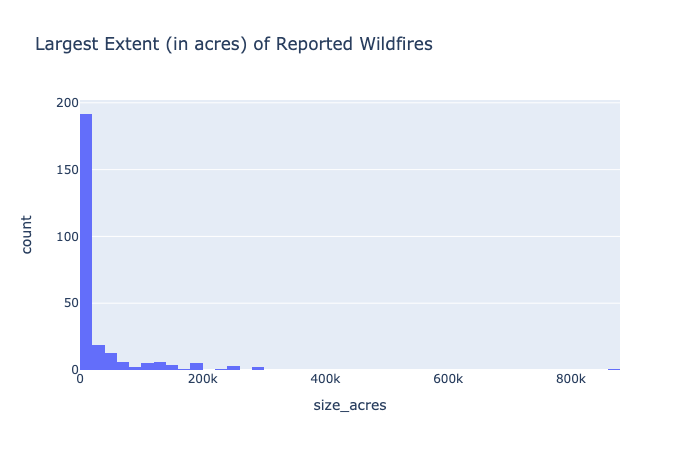

<IPython.core.display.Javascript object>

In [5]:
px.histogram(
    data_frame=all_incidents.groupby("incident_name").size_acres.max(),
    x="size_acres",
    title="Largest Extent (in acres) of Reported Wildfires",
)

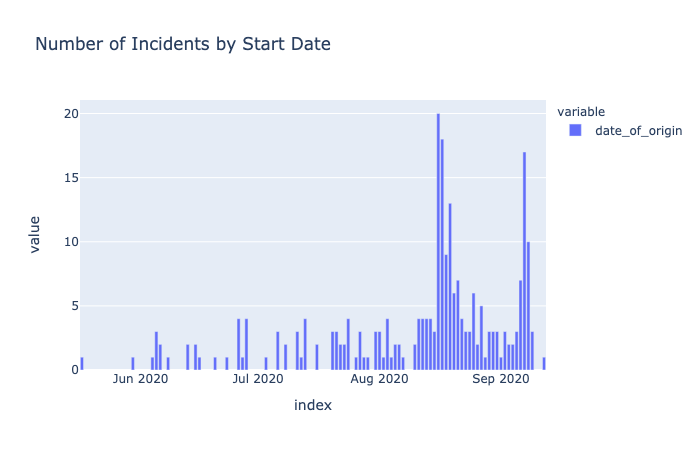

<IPython.core.display.Javascript object>

In [6]:
start_date_counts = (
    all_incidents.groupby("incident_name")
    .date_of_origin.last()
    .dropna()
    .dt.date.value_counts()
)

px.bar(start_date_counts, title="Number of Incidents by Start Date")

# Investigate causes of fires

 - What are all of the causes?
 - What are the common groupings of causes?
 - How prevalent has each been this season?


In [7]:
sorted(all_incidents.cause.astype("str").unique().tolist())

['Human',
 'Human Caused',
 'Human Caused - Under Investigation',
 'Human Caused, Under Investigation',
 'Human, Under Investigation',
 'Human-caused',
 'Human-caused - Suspected Arson',
 'Lightning',
 'Lightning Strike',
 'Lightning/natural',
 'Natural - Lightning',
 'Natural, Lightning',
 'Powerline',
 'Taget Shooting',
 'Target Shooting',
 'The Fire Is Still Under Investigation And The Cause Is Not Yet Known',
 'Trained Fire Investigators Have Determined The Inchelium Complex To Be Started By Human Activity; However, Investigating Wildland Fires Is A Legal Process That Requires The Specific Fire Cause To Remain Confidential Until The Process Is Complete.',
 'Under Investigaion',
 'Under Investigation',
 'Undetermined',
 'Unknown',
 'Unknown, Under Investigation',
 'Unknown/under Investigation',
 'Unkown',
 'nan']

<IPython.core.display.Javascript object>

In [8]:
# fall through ordering
clean_causes = {
    "lightning": "lightning",
    "powerline": "powerline",
    "shooting": "guns",
    "arson": "arson",
    "human": "human",
    "under invest": "unknown",
    "unknown": "unknown",
    "unkown": "unknown",
    "undetermined": "unknown",
    "nan": "unknown",
}


def _clean_causes(s):
    for old, new in clean_causes.items():
        if old in s.lower():
            return new

    return s


cleaned_causes = all_incidents.cause.astype("str").apply(_clean_causes)

<IPython.core.display.Javascript object>

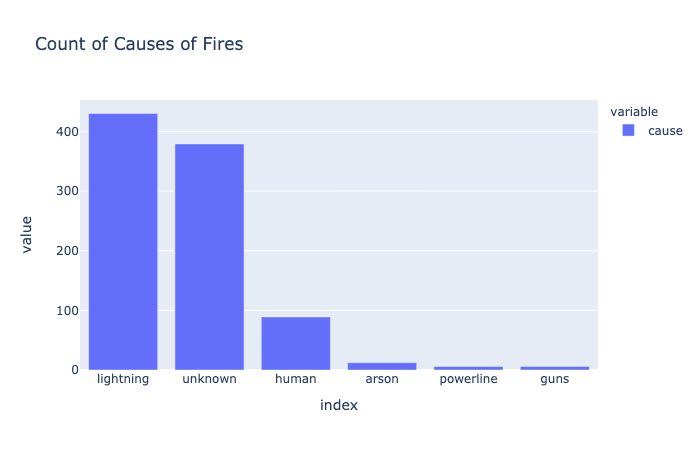

<IPython.core.display.Javascript object>

In [9]:
px.bar(data_frame=cleaned_causes.value_counts(), title="Count of Causes of Fires")

# Investigate fuels of fires

 - What are all of the fuels?
 - What are the common groupings of causes?
 - How do the fuels relate to growth rates?


In [10]:
fuels = [
    "chaparral",
    "tall grass",
    "short grass",
    "grass",
    "timber",
    "brush",
    "rugged terrain",
    "sage",
    "understory",
    "litter",
    "fir",
    "pine",
]


def standardize_fuels(s):
    return pd.Series({f"fuel_{f}": f in s.lower() for f in fuels})


fuels = all_incidents.fuels_involved.astype("str").apply(standardize_fuels)

all_incidents = all_incidents.join(fuels)


<IPython.core.display.Javascript object>

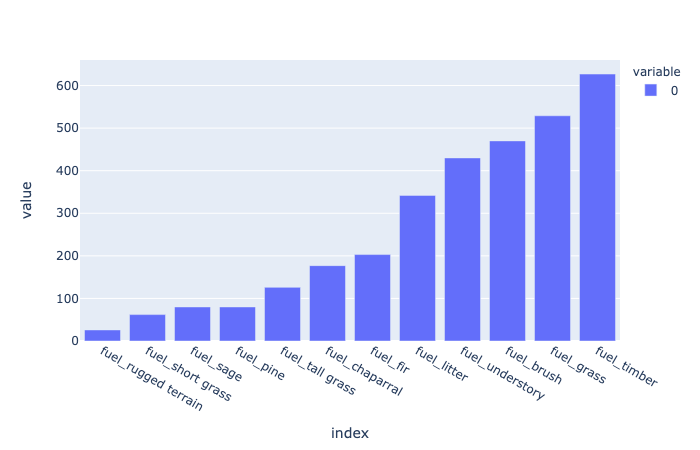

<IPython.core.display.Javascript object>

In [11]:
px.bar(data_frame=all_incidents.filter(like="fuel_").sum().sort_values())

# Plot fire progression over time as available

 - What do the different "burn rates" look like for these fires?
 

In [12]:
most_recent_report = all_incidents.groupby("incident_name").last()
most_recent_report.head()

,current_as_of,incident_type,date_of_origin,incident_commander,percent_of_perimeter_contained,size_acres,lat,lon,cause,total_personnel,...,fuel_short grass,fuel_grass,fuel_timber,fuel_brush,fuel_rugged terrain,fuel_sage,fuel_understory,fuel_litter,fuel_fir,fuel_pine
incident_name,,,,,,,,,,,,,,,,,,,,,
#6,2020-08-12 08:22:14-05:00,Wildfire,2020-08-06 17:00:00,Samuel Blacksmith,0.95,1367.0,43.273,-102.711,Human,9,...,False,False,False,False,False,False,False,False,False,False
2020 Coronado BAER,2020-07-15 16:18:28-05:00,Burned Area Emergency Response,NaT,None,NaN,NaN,32.345,-110.876,None,None,...,False,False,False,False,False,False,False,False,False,False
2020 Tonto NF BAER Information,2020-06-28 10:54:19-05:00,Burned Area Emergency Response,NaT,None,NaN,NaN,33.591,-111.418,None,None,...,False,False,False,False,False,False,False,False,False,False
Alder Fire,2020-09-05 09:26:24-05:00,Wildfire,2020-08-27 17:45:00,None,NaN,633.0,33.600,-110.450,Lightning,None,...,True,True,False,True,False,False,False,False,False,False
Anglin Fire,2020-08-02 09:25:48-05:00,Wildfire,2020-07-27 16:15:00,Dean Kiefer,1.00,1992.0,48.652,-119.248,Under Investigation,215,...,False,False,False,False,False,False,False,False,False,False


<IPython.core.display.Javascript object>

In [30]:
most_recent_report["burn_rate"].dropna().sort_values().tail(25)

incident_name
Griffin Fire                 6.189700e+03
Evans Canyon                 6.318083e+03
Woodhead                     8.414800e+03
August Complex North Zone    8.510300e+03
Sarpy                        8.668333e+03
Badger                       8.828500e+03
North Complex                9.057258e+03
Rice and Snider Fire         9.420600e+03
Woodhead Fire                9.916750e+03
Elkhorn Fire                 1.021236e+04
Whitney Fire                 1.415889e+04
Riverside Fire               1.510822e+04
Slater/Devil Fires           1.666656e+04
Archie Creek Fire            1.792700e+04
Slater/ Devil Fires          1.844788e+04
Cold Springs Fire            1.895920e+04
Archie Creek                 2.022983e+04
Creek Fire                   2.039633e+04
SCU Lightning Complex        2.085486e+04
Holiday Farm Fire            2.378614e+04
Pearl Hill Fire              2.485889e+04
Cold Springs                 2.697886e+04
August Complex               2.707016e+04
Lake                

<IPython.core.display.Javascript object>

In [32]:
most_recent_report["burn_rate"] = (
    most_recent_report.size_acres
    / (
        most_recent_report.current_as_of.dt.tz_convert(None)
        - most_recent_report.date_of_origin
    ).dt.days
)

# get the 25 fastest burning to plot
to_plot = most_recent_report["burn_rate"].dropna().sort_values().tail(25)

to_plot

incident_name
Griffin Fire                 6.189700e+03
Evans Canyon                 6.318083e+03
Woodhead                     8.414800e+03
August Complex North Zone    8.510300e+03
Sarpy                        8.668333e+03
Badger                       8.828500e+03
North Complex                9.057258e+03
Rice and Snider Fire         9.420600e+03
Woodhead Fire                9.916750e+03
Elkhorn Fire                 1.021236e+04
Whitney Fire                 1.415889e+04
Riverside Fire               1.510822e+04
Slater/Devil Fires           1.666656e+04
Archie Creek Fire            1.792700e+04
Slater/ Devil Fires          1.844788e+04
Cold Springs Fire            1.895920e+04
Archie Creek                 2.022983e+04
Creek Fire                   2.039633e+04
SCU Lightning Complex        2.085486e+04
Holiday Farm Fire            2.378614e+04
Pearl Hill Fire              2.485889e+04
Cold Springs                 2.697886e+04
August Complex               2.707016e+04
Lake                

<IPython.core.display.Javascript object>

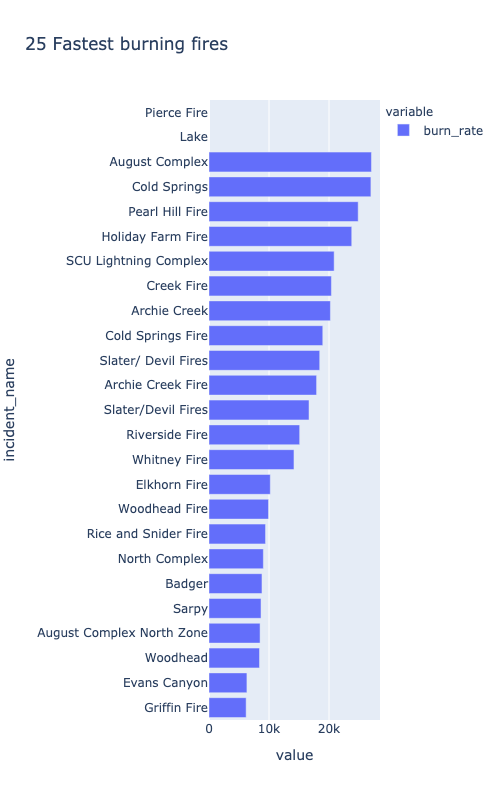

<IPython.core.display.Javascript object>

In [33]:
f = px.bar(
    data_frame=most_recent_report["burn_rate"].dropna().sort_values().tail(25),
    orientation="h",
    title="25 Fastest burning fires",
)

# set the width and height for this plot
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 800

f.show(renderer="png")